# Evaluarea pentru examenul **Inteligența Artificială** 

* Lucrarea este pentru studenții grupei 2I, anul de studii 2024-2025.

* Realizați fiecare întrebare și testați codurile care le-ați elaborat.

* Semnați lucrarea prin includerea numelui și prenumelui dvs  și adăugați înaintea prinei întrebări un bloc în care vă prezentați.

***Succese în realizarea lucrării de examen!***

Timp de realizare (***fără ChatGPT&Other***) 3h!

### Întrebarea 1: Analiza exploratorie a datelor

Încărcați datele din fișierul `HR_Employee_Attrition.csv` folosind biblioteca `pandas`. După încărcare, realizați următoarele:

1. Afișați numărul total de rânduri și coloane.

2. Enumerați toate coloanele din dataset și tipurile lor de date.

3. Verificați dacă există valori lipsă și calculați numărul de valori lipsă pentru fiecare coloană.

4. Examinați distribuția valorilor din coloana **Attrition** (variabila țintă) și prezentați rezultatele sub formă de grafic.

In [46]:
import os
data_path = ['data']
import numpy as np
import pandas as pd

filepath = os.sep.join(data_path + ['HR_Employee_Attrition.csv'])
data = pd.read_csv(filepath)

print("Number of rows:", data.shape[0])

print("Number of columns:", data.shape[1])

print("Data types:")
print(data.dtypes)


Number of rows: 1470
Number of columns: 35
Data types:
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64


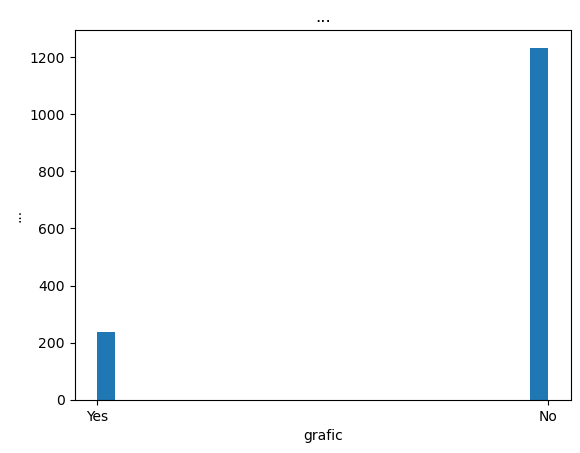

In [48]:
# Using Matplotlib's plotting functionality
import matplotlib.pyplot as plt
%matplotlib inline 

ax = plt.axes()
ax.hist(data.Attrition, bins=25);

ax.set(xlabel='grafic', 
       ylabel='...',
       title='...');
plt.show()

### Întrebarea 2: Preprocesarea datelor
    
1. Examinați variabilele de tip **object** (`BusinessTravel`, `Department`, `EducationField`, etc.) și realizați o conversie adecvată în variabile numerice folosind:
* `Label Encoding` pentru coloanele cu puține categorii (ex.: *Gender*).
* `One-Hot Encoding` pentru coloanele cu mai multe categorii (ex.: *JobRole*).
2. Normalizați variabilele numerice (de exemplu: *Age*, *MonthlyIncome*) folosind **MinMaxScaler** astfel încât valorile să fie între 0 și 1.


In [42]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler 

data = pd.DataFrame({ 
    'BusinessTravel': ['Travel_Rarely', 'Travel_Frequently', 'Non-Travel', 'Travel_Rarely'], 
    'Department': ['Sales', 'Research & Development', 'Sales', 'HR'], 
    'EducationField': ['Life Sciences', 'Medical', 'Marketing', 'Technical Degree'], 
    'Gender': ['Male', 'Female', 'Male', 'Female'], 
    'JobRole': ['Sales Executive', 'Research Scientist', 'Manager', 'Human Resources'], 
    'Age': [35, 40, 28, 50], 
    'MonthlyIncome': [5000, 6000, 2000, 8000] 
}) 

low_cardinality_cols = ['Gender', 'BusinessTravel']  
high_cardinality_cols = ['Department', 'EducationField', 'JobRole']   
 
label_encoder = LabelEncoder() 
for col in low_cardinality_cols: 
    data[col] = label_encoder.fit_transform(data[col]) 
 
data = pd.get_dummies(data, columns=high_cardinality_cols, drop_first=False) 

data = data.map(lambda x: 1 if x else 0) 

scaler = MinMaxScaler() 
numeric_cols = ['Age', 'MonthlyIncome'] 
data[numeric_cols] = scaler.fit_transform(data[numeric_cols]) 

print(data)

   BusinessTravel  Gender  Age  MonthlyIncome  Department_HR  \
0               1       1  0.0            0.0              0   
1               1       0  0.0            0.0              0   
2               0       1  0.0            0.0              0   
3               1       0  0.0            0.0              1   

   Department_Research & Development  Department_Sales  \
0                                  0                 1   
1                                  1                 0   
2                                  0                 1   
3                                  0                 0   

   EducationField_Life Sciences  EducationField_Marketing  \
0                             1                         0   
1                             0                         0   
2                             0                         1   
3                             0                         0   

   EducationField_Medical  EducationField_Technical Degree  \
0                   

### Întrebarea 3: Crearea subseturilor de date

1. Filtrați angajații cu **Attrition = "Yes"** și calculați următoarele statistici descriptive:
* Media și deviația standard pentru variabilele *Age*, *MonthlyIncome* și *YearsAtCompany*.
2. Creați un subset cu angajații care au **OverTime = "Yes"** și **WorkLifeBalance = 1**. Analizați distribuția variabilei *Attrition* în acest subset.

### Întrebarea 4: Corelații și relații între variabile

1. Calculați matricea de corelație pentru toate coloanele numerice.
* Identificați variabilele care au cea mai mare corelație pozitivă și negativă cu *Attrition*.
2. Realizați un boxplot pentru variabila `MonthlyIncome` în funcție de `Attrition` (`Yes` și `No`). Ce observați?

### Întrebarea 5: Construirea unui model SVM

1. Pregătiți datele pentru modelare:

* **Variabile independente**: toate coloanele numerice și variabilele encodate.
* **Variabila țintă**: `Attrition` (convertește valorile în 0 și 1: **Yes = 1**, **No = 0**).
2. Împărțiți datele în **seturi de antrenare** și **testare** (80%-20%).
3. Antrenați un **Support Vector Machine (SVM)** folosind un **kernel liniar**.
* Afișați numărul de suport vectori pentru fiecare clasă.
4. Evaluați performanța modelului pe setul de testare folosind următorii metrici:
* **Acuratețea**
* **Precizia**
* **Recall-ul**
* **F1-Score**

### Întrebarea 6: Compararea kernelurilor pentru SVM
1. Antrenați un model SVM folosind următoarele kerneluri:
* **Liniar**
* **RBF (Radial Basis Function)**
* **Polinomial (grad 3)**
2. Comparați performanțele celor trei modele folosind **acuratețea** și **F1-Score** pe setul de testare.
3. Explicați care kernel a performat cel mai bine și de ce credeți că acesta este cazul.

### Întrebarea 7: Optimizarea modelului SVM
1. Utilizați **GridSearchCV** pentru a optimiza hiperparametrii modelului SVM (de exemplu, `C` și `gamma` pentru kernelul RBF).
2. Afișați hiperparametrii care maximizează performanța pe setul de validare.
3. Re-antrenați modelul cu acești hiperparametri și evaluați performanța pe setul de testare.

### Întrebarea 8: Compararea SVM cu alte modele
1. Antrenați un **arbore de decizie** și un model de regresie logistică pe aceleași date.
2. Comparați performanța acestor modele cu cea a modelului SVM folosind aceleași metrici: **acuratețea**, **precizia**, **recall-ul** și **F1-Score**.
3. Care model este cel mai potrivit pentru datele analizate și de ce?